In [1]:
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from tensorflow import keras

In [8]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

print(X_train.shape, X_train.dtype)
print(Y_train.shape, Y_train.dtype)
print(X_test.shape, X_test.dtype)
print(Y_test.shape, Y_test.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


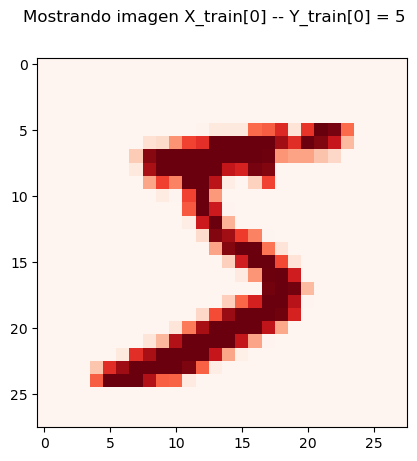

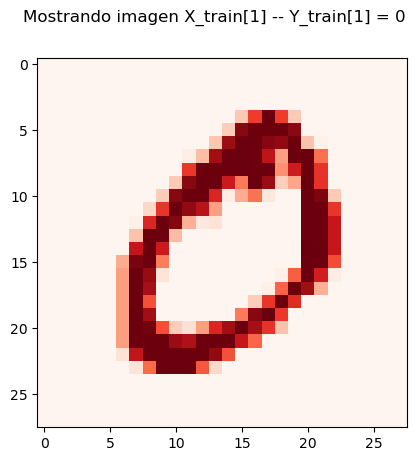

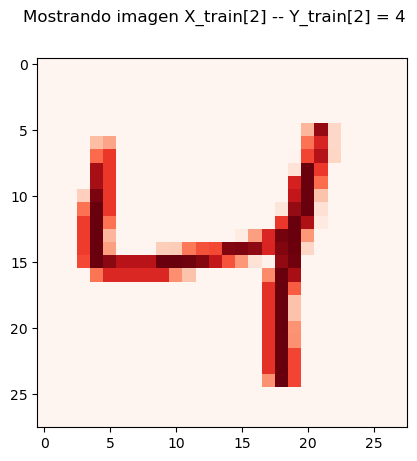

In [9]:
import matplotlib.pyplot as plt

def show_image(imagen, title):
    plt.figure()
    plt.suptitle(title)
    plt.imshow(imagen, cmap = "Reds")
    plt.show()
    
for i in range(3):
    title = "Mostrando imagen X_train[" + str(i) + "]"
    title = title + " -- Y_train[" + str(i) + "] = " + str(Y_train[i])
    show_image(X_train[i], title)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_X(X, title, xscale, yscale):
    plt.title(title)
    plt.plot(X)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.show()

# Example values for fila and columna
fila = 1
columna = 1

features_fila_col = X_train[:, fila, columna]
print(len(np.unique(features_fila_col)))

title = "Valores en (" + str(fila) + ", " + str(columna) + ")"
xscale = "linear"  # Define the xscale
yscale = "linear"  # Define the yscale

plot_X(features_fila_col, title, xscale, yscale)


NameError: name 'X_train' is not defined

In [5]:
import numpy as np
from tensorflow.keras.datasets import mnist

class DecisionStump:
    def __init__(self, n_features):
        self.feature_index = np.random.randint(0, n_features)
        self.threshold = None
        self.polarity = 1
        self.n_features = n_features
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_index]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column >= self.threshold] = -1
        return predictions

class AdaBoost:
    def __init__(self, T=5, A=20):
        self.T = T
        self.A = A
        self.clfs = []

    def fit(self, X, Y, verbose=False):
        n_samples, n_features = X.shape
        w = np.full(n_samples, (1 / n_samples))

        for t in range(self.T):
            min_error = float('inf')
            best_clf = None

            for _ in range(self.A):
                clf = DecisionStump(n_features)
                clf.threshold = np.random.uniform(min(X[:, clf.feature_index]), max(X[:, clf.feature_index]))
                clf.polarity = 1
                predictions = clf.predict(X)
                error = np.sum(w[Y != predictions])
                if error > 0.5:
                    error = 1 - error
                    clf.polarity = -1

                if error < min_error:
                    min_error = error
                    best_clf = clf

            EPS = 1e-10
            best_clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))
            predictions = best_clf.predict(X)
            w *= np.exp(-best_clf.alpha * Y * predictions)
            w /= np.sum(w)
            self.clfs.append(best_clf)

            if verbose:
                print(f'Classifier {t + 1}/{self.T}: error = {min_error}, alpha = {best_clf.alpha}')

    def predict(self, X):
        clf_preds = np.zeros(X.shape[0])
        for clf in self.clfs:
            predictions = clf.predict(X)
            clf_preds += clf.alpha * predictions
        return clf_preds

def run_adaboost_on_mnist(digit, T=5, A=20, verboseParam=False):
    print(f"Running AdaBoost for digit: {digit}")

    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    y_train_binary = np.where(y_train == digit, 1, -1)
    y_test_binary = np.where(y_test == digit, 1, -1)

    adaboost = AdaBoost(T=T, A=A)
    adaboost.fit(X_train, y_train_binary, verboseParam)
    y_pred = adaboost.predict(X_test)
    accuracy = np.sum(y_test_binary == np.sign(y_pred)) / len(y_test_binary)
    print(f"Accuracy for digit {digit}: {accuracy}")

    return accuracy

def run_adaboost_for_all_digits(T=5, A=20, verboseParam=False):
    accuracies = {}
    for digit in range(10):
        accuracy = run_adaboost_on_mnist(digit, T, A, verboseParam)
        accuracies[digit] = accuracy
    return accuracies

In [16]:
accuracy = run_adaboost_on_mnist(digit=3, T=5, A=20, verboseParam=True)  # Ejecutamos AdaBoost

Running AdaBoost for digit: 3
Classifier 1/5: error = 0.10218333333333307, alpha = 1.086598651832311
Classifier 2/5: error = 0.303454220585088, alpha = 0.41545137891232986
Classifier 3/5: error = 0.362483439215905, alpha = 0.2823007329735958
Classifier 4/5: error = 0.2993522570661864, alpha = 0.4251921283987059
Classifier 5/5: error = 0.3217613903277333, alpha = 0.37284445525500337
Accuracy for digit 3: 0.9087


In [20]:
all_accuracies = run_adaboost_for_all_digits(T=5, A=20, verboseParam=True) # Ejecutamos AdaBoost para todos los dígitos
print("Accuracies for all digits:", all_accuracies) # Imprimimos las precisiones

Running AdaBoost for digit: 0
Classifier 1/5: error = 0.09871666666666634, alpha = 1.1057829393131757
Classifier 2/5: error = 0.33041960474350895, alpha = 0.3531439320126556
Classifier 3/5: error = 0.30904307906627715, alpha = 0.40229839846694015
Classifier 4/5: error = 0.25748846281434246, alpha = 0.5295317470520452
Classifier 5/5: error = 0.22012508846827528, alpha = 0.6324687839746882
Accuracy for digit 0: 0.9157
Running AdaBoost for digit: 1
Classifier 1/5: error = 0.11236666666666639, alpha = 1.0333957052290297
Classifier 2/5: error = 0.24872177625257402, alpha = 0.5527205733113826
Classifier 3/5: error = 0.3418415400727879, alpha = 0.32754921309001794
Classifier 4/5: error = 0.24243428532229216, alpha = 0.5696898000491027
Classifier 5/5: error = 0.3792750973515555, alpha = 0.24631310023252181
Accuracy for digit 1: 0.8977
Running AdaBoost for digit: 2
Classifier 1/5: error = 0.09929999999999972, alpha = 1.1025133334212744
Classifier 2/5: error = 0.320509405324657, alpha = 0.375715

In [6]:
class AdaBoostMulticlass:
    def __init__(self, T=5, A=20):
        self.T = T
        self.A = A
        self.models = []

    def fit(self, X, y, verbose=False):
        for digit in range(10):
            y_binary = np.where(y == digit, 1, -1)
            model = AdaBoost(T=self.T, A=self.A)
            model.fit(X, y_binary, verbose)
            self.models.append(model)

    def predict(self, X):
        model_preds = np.array([model.predict(X) for model in self.models])
        return np.argmax(model_preds, axis=0)

def run_adaboost_multiclass_on_mnist(T=5, A=20, verboseParam=False):
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    adaboost_multiclass = AdaBoostMulticlass(T=T, A=A)
    adaboost_multiclass.fit(X_train, y_train, verboseParam)
    y_pred = adaboost_multiclass.predict(X_test)
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    print(f"Multiclass Accuracy: {accuracy}")
    return accuracy

accuracy = run_adaboost_multiclass_on_mnist(T=1500, A=500, verboseParam=False)

Multiclass Accuracy: 0.9251
